# Simple Linear Regression Analysis
* Data: Airfoil Self-Noise Data Set from UCI Machine Learning Repository
* Link: [airfoil_self_noise.dat](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

print('Scikit-learn:\t', sklearn.__version__)
print('Numpy:\t\t', np.__version__)
print('Pandas:\t\t', pd.__version__)
print('Matplotlib:\t', mpl.__version__)

Scikit-learn:	 0.19.0
Numpy:		 1.13.1
Pandas:		 0.20.3
Matplotlib:	 2.0.2


## Read data

In [2]:
data = pd.read_csv('./data/airfoil_self_noise.csv')

In [3]:
data.head()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
data.describe()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frquency(Hz)            1503 non-null int64
Angle_of_Attack         1503 non-null float64
Chord_Length            1503 non-null float64
Free_stream_velocity    1503 non-null float64
Displacement            1503 non-null float64
Sound_pressure_level    1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [6]:
# check null values
data.isnull().sum()

Frquency(Hz)            0
Angle_of_Attack         0
Chord_Length            0
Free_stream_velocity    0
Displacement            0
Sound_pressure_level    0
dtype: int64

In [7]:
# Check correlation
data.corr()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
Frquency(Hz),1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle_of_Attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Displacement,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound_pressure_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


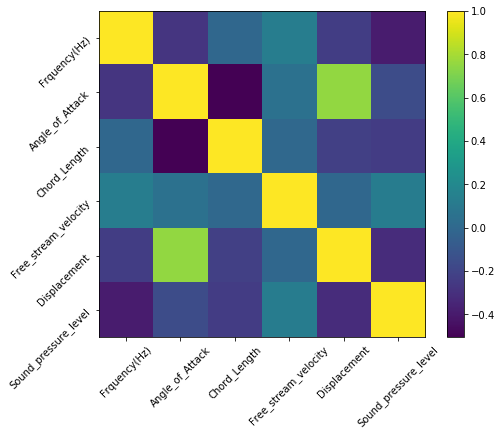

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(data.corr())
plt.colorbar(img)
plt.xticks(range(6), list(data.columns), rotation=45, fontsize=10)
plt.yticks(range(6), list(data.columns), rotation=45, fontsize=10)
plt.show()

## Fit linear regression model

In [9]:
x = data[data.columns[:-1]].values
y = data['Sound_pressure_level'].values
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

In [10]:
print('Coefficient:\t', *model.coef_)
print('Intercept:\t', model.intercept_)
print('MSE:\t\t', sklearn.metrics.mean_squared_error(y, y_hat))
print('R2:\t\t', sklearn.metrics.r2_score(y, y_hat))

Coefficient:	 -0.00128220710891 -0.421911705948 -35.6880012258 0.0998540448518 -147.300518778
Intercept:	 132.833805778
MSE:		 23.0327472606
R2:		 0.515709742093


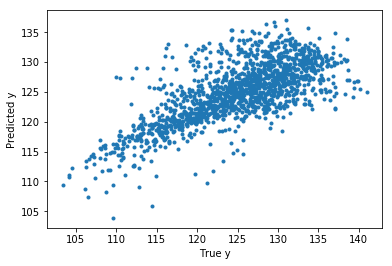

In [11]:
fig, ax = plt.subplots()
ax.plot(y, y_hat, '.')
ax.set_xlabel('True y')
ax.set_ylabel('Predicted y')
plt.show()

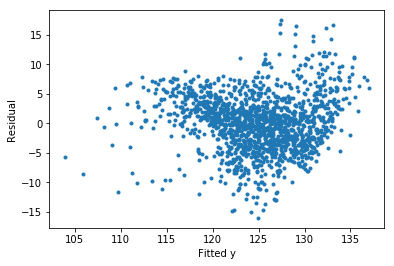

In [12]:
fig, ax = plt.subplots()
ax.plot(y_hat, y_hat - y, '.')
ax.set_xlabel('Fitted y')
ax.set_ylabel('Residual')
plt.show()

## Cross Validation

In [13]:
x = data[data.columns[:-1]].values
y = data['Sound_pressure_level'].values
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
print('Neg-MSE:\t', *scores)

scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print('R2:\t\t', *scores)

Neg-MSE:	 -9.21171285248 -20.4600763714 -23.0973205748 -56.9831476379 -26.1908592787
R2:		 0.704622734893 0.528586026405 0.58964898335 -0.310560828119 0.536851050092
